In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gsw
import oceanspy as ospy
import cmocean.cm as cmo

In [25]:
df = xr.open_dataset('D:/MScData/fullYear_S_Eta_EKE_Depth_hor_vel_SIarea_Temp.nc')
df

<xarray.Dataset>
Dimensions:    (Z: 10, Zp1: 11, Zu: 10, Zl: 10, X: 435, Y: 47, Xp1: 436,
                Yp1: 48, time: 1460, time_midp: 1459)
Coordinates: (12/18)
  * Z          (Z) float64 -3.5 -7.0 -11.5 -17.0 ... -39.5 -49.0 -59.5 -71.0
  * Zp1        (Zp1) float64 -2.0 -5.0 -9.0 -14.0 ... -44.0 -54.0 -65.0 -77.0
  * Zu         (Zu) float64 -5.0 -9.0 -14.0 -20.0 ... -44.0 -54.0 -65.0 -77.0
  * Zl         (Zl) float64 -2.0 -5.0 -9.0 -14.0 ... -35.0 -44.0 -54.0 -65.0
  * X          (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y          (Y) float64 72.0 72.02 72.04 72.07 ... 72.93 72.95 72.97 73.0
    ...         ...
  * time       (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
    YU         (Y, Xp1) float64 ...
    XU         (Y, Xp1) float64 ...
    YV         (Yp1, X) float64 ...
    XV         (Yp1, X) float64 ...
  * time_midp  (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 2018-08-31T...
Data variables:
    Depth      (Y, X) float64 ...
    Temp       (time, Z, Y, X) float64 ...
    S          (time, Z, Y, X) float64 ...
    Eta        (time, Y, X) float64 ...
    SIarea     (time, Y, X) float64 ...
    hor_vel    (time, Z, Y, X) float64 ...
    EKE        (time, Z, Y, X) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [4]:
display(df['S'])

<xarray.DataArray 'S' (time: 1460, Z: 10, Y: 47, X: 435)>
[298497000 values with dtype=float64]
Coordinates:
  * Z        (Z) float64 -3.5 -7.0 -11.5 -17.0 -23.5 ... -39.5 -49.0 -59.5 -71.0
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 72.0 72.02 72.04 72.07 72.09 ... 72.93 72.95 72.97 73.0
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
  * time     (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
Attributes:
    long_name:      salinity
    standard_name:  sea_water_salinity
    units:          g kg-1
    _coordinates:   XC YC RC iter

In [22]:
SA = df['S'].resample(time='ME').mean(dim='time').sel(Z=-3.5)

In [26]:
depth = df['Depth']

Text(0.5, 1.0, '2018-08')

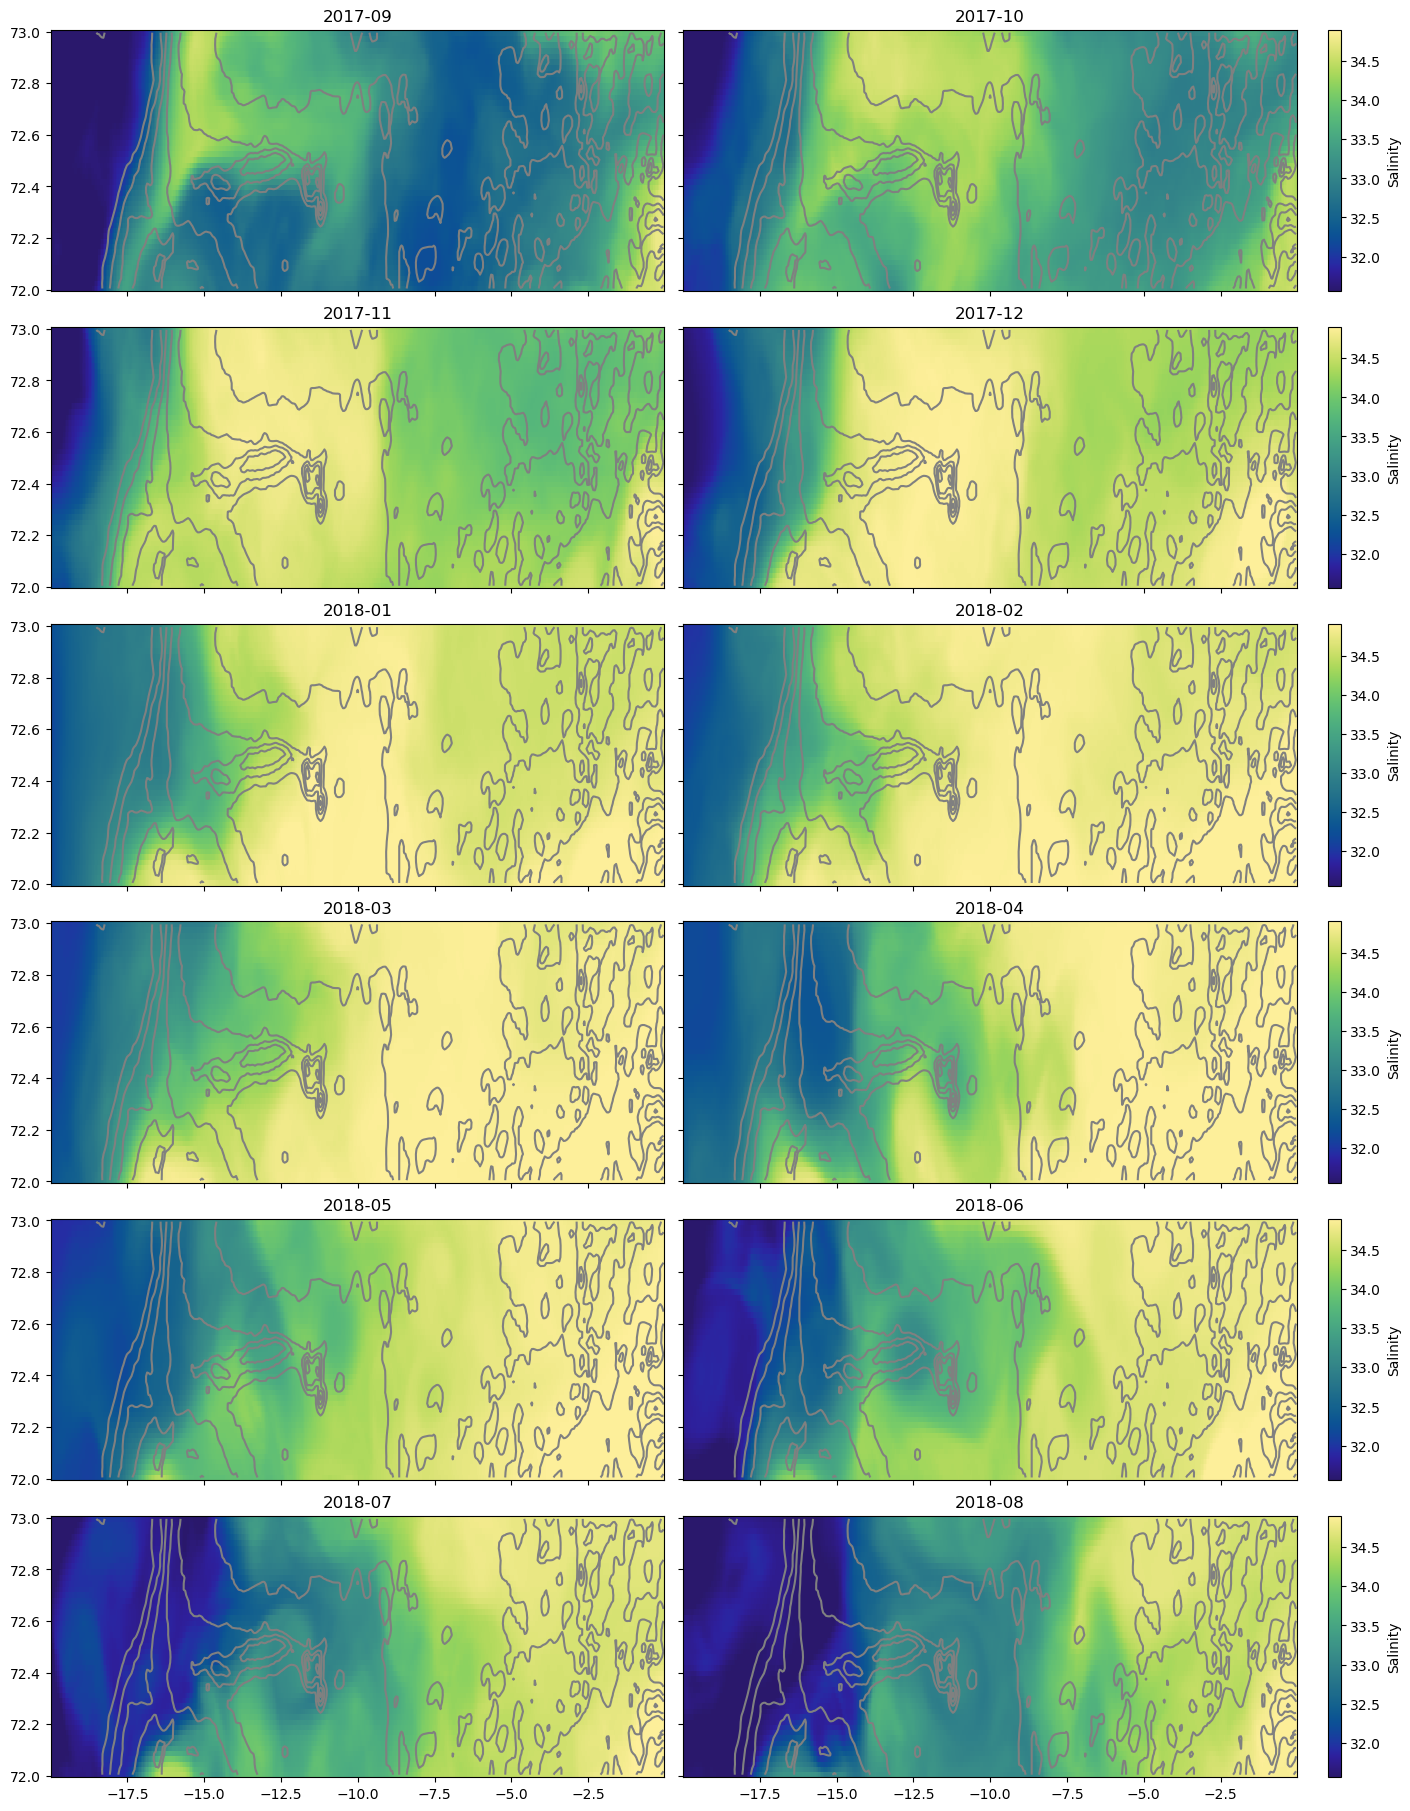

In [35]:
smin = SA.mean(dim='time').min()
smax = SA.mean(dim='time').max()

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2,figsize=(14,18),layout='constrained',sharex=True,sharey=True)

Å = 0
ax1.contour(depth.X,depth.Y,depth,colors='grey')
ax1.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax1.set_title(str(SA.time[Å].values)[0:7])

Å = 1
ax2.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax2.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax2.set_title(str(SA.time[Å].values)[0:7])

Å = 2
ax3.contour(depth.X,depth.Y,depth,colors='grey')
ax3.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax3.set_title(str(SA.time[Å].values)[0:7])

Å = 3
ax4.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax4.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax4.set_title(str(SA.time[Å].values)[0:7])

Å = 4
ax5.contour(depth.X,depth.Y,depth,colors='grey')
ax5.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax5.set_title(str(SA.time[Å].values)[0:7])

Å = 5
ax6.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax6.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax6.set_title(str(SA.time[Å].values)[0:7])

Å = 6
ax7.contour(depth.X,depth.Y,depth,colors='grey')
ax7.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax7.set_title(str(SA.time[Å].values)[0:7])

Å = 7
ax8.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax8.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax8.set_title(str(SA.time[Å].values)[0:7])

Å = 8
ax9.contour(depth.X,depth.Y,depth,colors='grey')
ax9.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax9.set_title(str(SA.time[Å].values)[0:7])

Å = 9
ax10.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax10.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax10.set_title(str(SA.time[Å].values)[0:7])

Å = 10
ax11.contour(depth.X,depth.Y,depth,colors='grey')
ax11.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
ax11.set_title(str(SA.time[Å].values)[0:7])

Å = 11
ax12.contour(depth.X,depth.Y,depth,colors='grey')
mesh = ax12.pcolormesh(SA.X,SA.Y,SA[Å],cmap=cmo.haline,vmin=smin,vmax=smax)
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
ax12.set_title(str(SA.time[Å].values)[0:7])